In [511]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import myPickle
from settings import *

ylim0 = (.95, 1.003)
ylim1 = (.95, 1.003)

In [509]:
def load_data(path):
    rng_seed, target, inj_logs, scores_FedSGDm, canary_scores_FedAVG = myPickle.load(path)
    scores_sgd = np.array([x[1][0]['accuracy'] for x in scores_FedSGDm])
    scores_avg = np.array([x['accuracy'] for x in canary_scores_FedAVG])
    return scores_sgd, scores_avg, target, inj_logs, scores_FedSGDm, canary_scores_FedAVG, rng_seed

def get_all(home):
    paths = glob(home)
    print(len(paths), home)
    sgd = []
    avg = []
    for path in paths:
        scores_sgd, scores_avg, target, inj_logs, scores_FedSGDm, canary_scores_FedAVG, rng_seed = load_data(path)
        sgd.append(scores_sgd[np.newaxis,:])
        avg.append(scores_avg[np.newaxis,:])

    sgd = np.concatenate(sgd, 0)
    avg = np.concatenate(avg, 0)
    return sgd, avg

def plot_sgd(sgd_scores, ax, std=False, **kargs):
    
    avg_scores = sgd_scores.mean(0)
    avg_std = sgd_scores.std(0)

    if std:
        ax.fill_between(batch_size_tests, (avg_scores-avg_std), (avg_scores+avg_std), color=kargs['color'], alpha=.1)
    ax.plot(batch_size_tests, avg_scores, **kargs);
    
    ax.set(
        xticks=batch_size_tests,
        xticklabels=batch_size_tests,
        xlabel="Batch size",
        ylabel="MIA accuracy",
        ylim=ylim0,
    );


def plot_avg(avg_scores, ax, std=False, **kargs):
    
    avg_scores = avg_scores.mean(0)
    avg_std = avg_scores.std(0)
    iters = np.arange(len(avg_scores))+1
    
    if std:
        ax.fill_between(iters, (avg_scores-avg_std), (avg_scores+avg_std), color=kargs['color'], alpha=.1)
    ax.plot(iters, avg_scores, **kargs);
    
    ax.set(
        xticks=iters,
        xlabel="Number of local SGD steps (FedAVG)",
        ylabel="MIA accuracy",
        ylim=ylim1,
    );
    
def plot(home, ax0, ax1, **kargs):
    sgd_scores, avg_scores = get_all(home)
    plot_sgd(sgd_scores, ax0, **kargs);
    plot_avg(avg_scores, ax1, **kargs);
    


50 ./results_bce//*-cifar10_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001
50 ./results_bce//*-cifar100_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001
50 ./results_bce//*-tinyimagenet_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001
50 ./results_bce//*-cifar10_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001
50 ./results_bce//*-cifar100_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001
50 ./results_bce//*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001


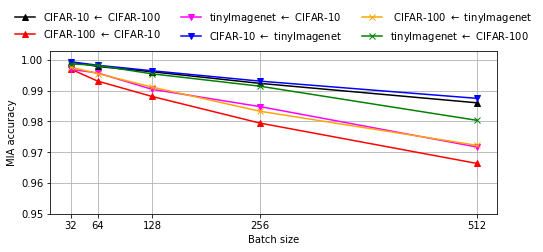

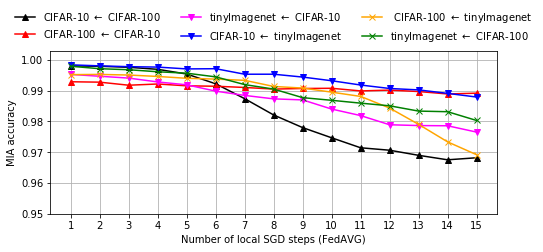

In [514]:
fig0, ax0 = plt.subplots(1, 1, figsize=(8, 3));
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 3));
    
home = './results_bce//*-cifar10_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='black', label='CIFAR-10 $\\leftarrow$ CIFAR-100', marker='^')

home = './results_bce//*-cifar100_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='red', label='CIFAR-100 $\\leftarrow$ CIFAR-10', marker='^')

home = './results_bce//*-tinyimagenet_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='magenta', label='tinyImagenet $\\leftarrow$ CIFAR-10', marker='v')
    
home = './results_bce//*-cifar10_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='blue', label='CIFAR-10 $\\leftarrow$ tinyImagenet', marker='v')

home = './results_bce//*-cifar100_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='orange', label=' CIFAR-100 $\\leftarrow$ tinyImagenet', marker='x')

home = './results_bce//*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='green', label='tinyImagenet $\\leftarrow$ CIFAR-100', marker='x')


def legend(ax):
    ax.legend(ncol=3, frameon=False, bbox_to_anchor=(1.10,1.3));
    ax.grid();

legend(ax0); legend(ax1);

fig0.savefig('imgs/fed_sgd_res20_canary.pdf', transparent=True, bbox_inches='tight');
fig1.savefig('imgs/fed_avg_res20_canary_lr001.pdf', transparent=True, bbox_inches='tight');

16 ./results/*-cifar10_cifar100_1_5_256_0.0003_resnet20_last_layer_0.0005
16 ./results/*-cifar100_cifar10_1_5_256_0.0003_resnet20_last_layer_0.0005


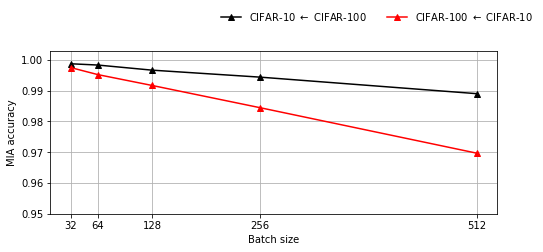

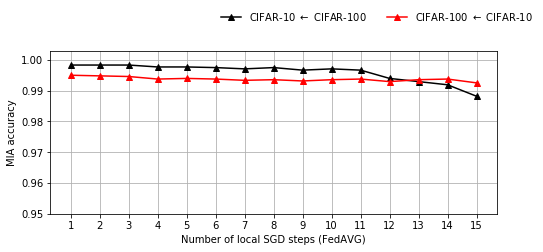

In [525]:
fig0, ax0 = plt.subplots(1, 1, figsize=(8, 3));
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 3));
    
home = './results/*-cifar10_cifar100_1_5_256_0.0003_resnet20_last_layer_0.0005'
plot(home, ax0, ax1, color='black', label='CIFAR-10 $\\leftarrow$ CIFAR-100', marker='^')

home = './results/*-cifar100_cifar10_1_5_256_0.0003_resnet20_last_layer_0.0005'
plot(home, ax0, ax1, color='red', label='CIFAR-100 $\\leftarrow$ CIFAR-10', marker='^')

# home = './results/*-tinyimagenet_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='magenta', label='tinyImagenet $\\leftarrow$ CIFAR-10', marker='v')
    
# home = './results/*-cifar10_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='blue', label='CIFAR-10 $\\leftarrow$ tinyImagenet', marker='v')

# home = './results/*-cifar100_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='orange', label=' CIFAR-100 $\\leftarrow$ tinyImagenet', marker='x')

# home = './results/*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='green', label='tinyImagenet $\\leftarrow$ CIFAR-100', marker='x')


def legend(ax):
    ax.legend(ncol=3, frameon=False, bbox_to_anchor=(1.10,1.3));
    ax.grid();

legend(ax0); legend(ax1);

# fig0.savefig('imgs/fed_sgd_res20_canary.pdf', transparent=True, bbox_inches='tight');
# fig1.savefig('imgs/fed_avg_res20_canary_lr001.pdf', transparent=True, bbox_inches='tight');

12 ./results/*-cifar10_cifar100_0_1_64_1e-05_resnet20_last_layer_0.001
15 ./results/*-cifar100_cifar10_0_1_64_1e-05_resnet20_last_layer_0.001
14 ./results/*-cifar10_tinyimagenet_0_1_64_1e-05_resnet20_last_layer_0.001


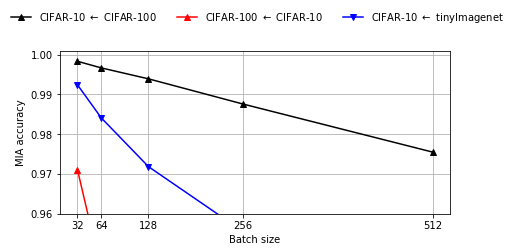

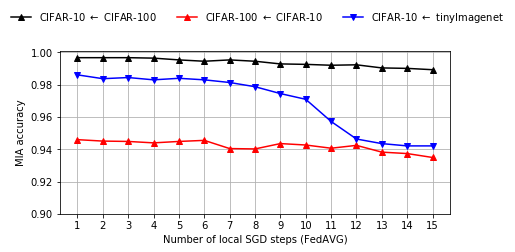

In [497]:
fig0, ax0 = plt.subplots(1, 1, figsize=(7, 3));
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 3));
    
home = './results/*-cifar10_cifar100_0_1_64_1e-05_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='black', label='CIFAR-10 $\\leftarrow$ CIFAR-100', marker='^')

home = './results/*-cifar100_cifar10_0_1_64_1e-05_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='red', label='CIFAR-100 $\\leftarrow$ CIFAR-10', marker='^')

# home = './results/*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='magenta', label='tinyImagenet $\\leftarrow$ CIFAR-10', marker='v')
    
home = './results/*-cifar10_tinyimagenet_0_1_64_1e-05_resnet20_last_layer_0.001'
plot(home, ax0, ax1, color='blue', label='CIFAR-10 $\\leftarrow$ tinyImagenet', marker='v')

# home = './results/*-cifar100_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='orange', label=' CIFAR-100 $\\leftarrow$ tinyImagenet', marker='x')

# home = './results/*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
# plot(home, ax0, ax1, color='green', label='tinyImagenet $\\leftarrow$ CIFAR-100', marker='x')


def legend(ax):
    ax.legend(ncol=3, frameon=False, bbox_to_anchor=(1.16,1.3));
    ax.grid();

legend(ax0); legend(ax1);

/home/pasquini/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


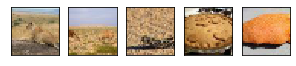

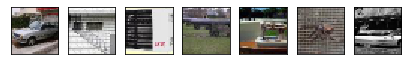

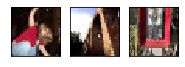

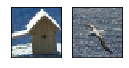

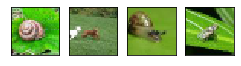

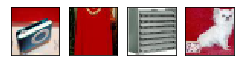

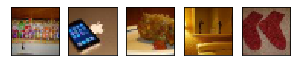

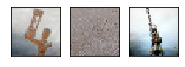

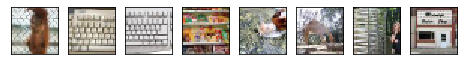

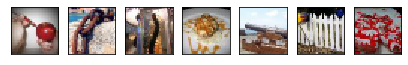

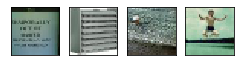

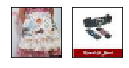

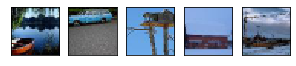

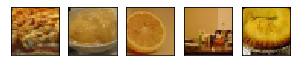

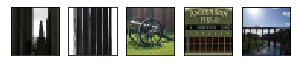

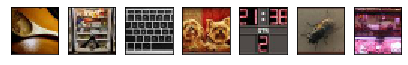

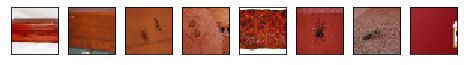

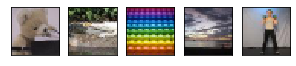

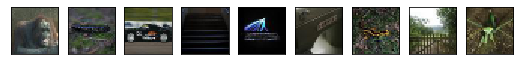

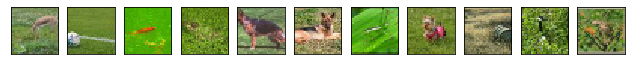

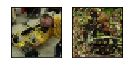

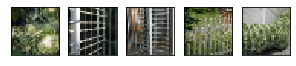

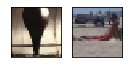

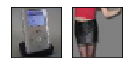

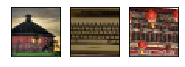

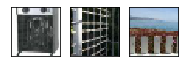

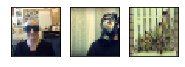

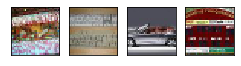

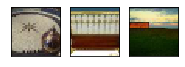

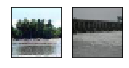

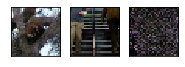

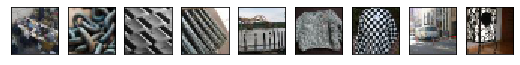

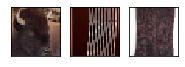

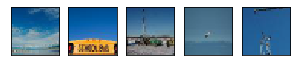

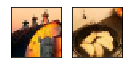

In [478]:
#home = './results_bce/*-cifar100_cifar10_1_5_256_0.0003_resnet20_last_layer_0.001'
#home = './results_bce/*-cifar10_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'
#home = './results_bce/*-cifar10_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
#home = './results_bce/*-cifar100_tinyimagenet_1_5_256_0.0003_resnet20_last_layer_0.001'
home = './results_bce/*-tinyimagenet_cifar100_1_5_256_0.0003_resnet20_last_layer_0.001'

paths = glob(home)
for I in range(len(paths)):
    
    #I = 27

    #print(np.array([x[1][0]['accuracy'] for x in scores_FedSGDm]))

    _, target, _, scores_FedSGDm, _ = myPickle.load(paths[I])
    fails = scores_FedSGDm[-1][1][1]
    
    #fails = fails[:4]
    
    n = len(fails)+1
    if n <= 1 or n > 15:
        continue
    fig, ax = plt.subplots(1,1*n,figsize=(1*n,1))

    ax[0].imshow((target[0]+1)/2)
    for i in range(n):
        if i == 0:
            x = target
        else:
            x = fails[i-1]
        x = x[0]
        ax[i].imshow((x+1)/2)
        ax[i].set(xticks=[], yticks=[])
                  #, title=str(I))
        ax[i].set_aspect('equal')
    #break 
#fig.savefig('imgs/false_positive4.pdf')